# Similar-Products
## ------------------------------

## Building Image based Recommender System

### 1. Importing Libraries

In [15]:
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os, os.path

### 2. Preprocessing of Trainning Set

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('images2/',
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode=None,
                                                 shuffle=False)

Found 16032 images belonging to 1 classes.


### 3. Building the model

In [17]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

### 4. Compiling the Model

In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

### 5. Training the Model

In [ ]:
asins = []

for i in training_set.filenames:
    asins.append(i[2:-5])
    
features_train = model.predict(training_set, nb_train_samples // batch_size)
features_train = features_train.reshape((16032,25088))

#saving the data so that next time we don't have to train the time taking model
np.save(open('features.npy', 'wb'), features_train)
np.save(open('feature_asins.npy', 'wb'), np.array(asins))

### 6. Importing Necessary Files

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from IPython.display import display, Image

features_train = np.load('features.npy')
asins = np.load('feature_asins.npy')
asins = list(asins)


### 7. Getting Similar Product Images

In [20]:
def similar_products_images(product_index, num_of_similar_products):
    df_asins = list(data['asin'])
    product_index = asins.index(df_asins[product_index])
    pairwise_dist = pairwise_distances(features_train, features_train[product_index].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_of_similar_products]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_of_similar_products]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            

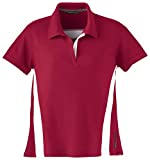

Product Title:  North End Sport Red 78616 Ladies' Polyester Pique Polo with Stripe - SPORT RED 807 - M
Euclidean Distance from input image: 4.862804e-06


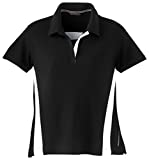

Product Title:  North End Sport Red 78616 Ladies' Polyester Pique Polo with Stripe - BLACK 703 - M
Euclidean Distance from input image: 30.529158


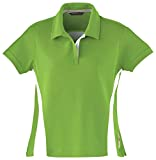

Product Title:  North End Sport Red 78616 Ladies' Polyester Pique Polo with Stripe - ACID GREEN 645 - M
Euclidean Distance from input image: 31.528242


In [21]:
similar_products_images(1200,3)